#Feature Selection Methods

1. Feature selection: univariate selection. Pearson correlation is only for linear relationship of two variables.

2. Mutual information and maximal information coefficient (MIC)

3. Model Based Ranking: Linear Regression, Lasso, and Random Forest regressor.  Use coefficient of regression models for selecting and interpreting features.  This approach can work well when the data is not very noisy and the features are independent.  

   Regularization is a method for adding additional constraints or penalty to a model with the goal of preventing overfitting and improving generalization. L1 regularization / Lasso (Linear model trained with L1 prior as regularizer) solves the minimization of the least-squares penalty. L2 regularization / Ridge (or Tikhomov regularization) solves a regression model where the loss function is the linear least squares function and regularizaion is given by the L2-norm.
   Random forests are among the most popular machine learning methods thanks to their relatively good accuracy, robustness and ease for use. Random forests are popular approaches for feature ranking. They provide two straightforward methods for feature selection: mean decrease impurity and mean decrease accuracy. Mean decrease impurity: Gini impurity or informatio gain/entropy for classification, variance for regression trees. Mean decrease accuracy is used to directly measure the impact of each feature on accuracy of the model, to permute the values of each feature and to measure how much the permutation decreases the accuracy of the model. 

4. Stability Seletion and Recursive Feature Elimination (RFE). Both can be considered wrapper methods. They build on top of other (model based) selectin methods such as regression or SVM, building models on different subsets of data and extracting the ranking from the aggregates. Stability selection is based on subsampling in combination with selection algorithm (which could be regression, SVMs or other similar method).

   Stability selection is useful for both pure feature selection to reduce overfitting and data interpretaton: in general, good features won't get 0 as coefficients because there are similar, correlated features in the dataset.
   Recursive feature elimination (RFE) is based on the idea to repeatedly construct a model (for example an SVM or a regression model) and to choose either the best or worst performing feature (for example based on coefficients), setting the feature aside and then repeating the process with the rest of the features.This process is applied until all features in the dataset are exhausted. Features are then ranked according to when they were eliminated. So it is a greedy optimization for finding the best performing subset of features.

In [1]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
# feature selection: univariate selection
# Pearson correlation

np.random.seed(0)
size = 300
x = np.random.normal(0, 1, size)
print("Low noise:", pearsonr(x, x + np.random.normal(0, 1, size)))
print("High noise:", pearsonr(x, x + np.random.normal(0, 10,size)))

Low noise: (0.71824836862138408, 7.3240173129983507e-49)
High noise: (0.057964292079338155, 0.31700993885324752)


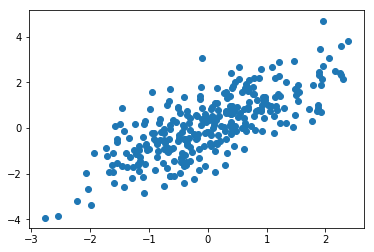

In [3]:
plt.scatter(x, x + np.random.normal(0, 1, size))
plt.show()

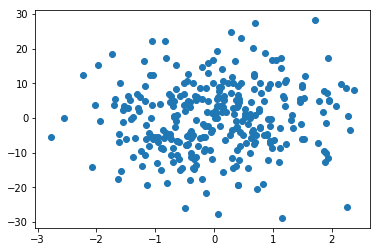

In [4]:
plt.scatter(x, x + np.random.normal(0, 10, size))
plt.show()

In [7]:
# Pearson correlation is only for linear relationship of two variables.

x = np.random.uniform(-1,1,size)
print("non-linear relationship")
print("High noise:", pearsonr(x, x**2))

non-linear relationship
High noise: (0.010361067100016986, 0.85816183565537207)


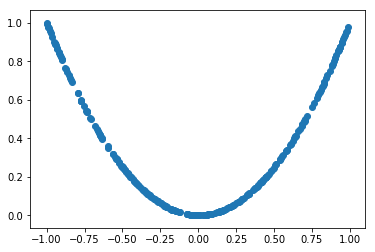

In [8]:
plt.scatter(x, x ** 2)
plt.show()

In [1]:
# Mutual information and maximal information coefficient (MIC)
import numpy as np
from minepy import MINE
m = MINE()

In [4]:
np.random.seed(0)
x = np.random.uniform(-1, 1, 300)
m.compute_score(x, x ** 2)
print("MIC:", round(m.mic(), 3))

MIC: 1.0


In [6]:
# Model based ranking

from sklearn.datasets import load_boston

In [7]:
boston = load_boston()

In [10]:
print(list(boston))
print(len(boston))

['target', 'data', 'feature_names', 'DESCR']
4


In [14]:
boston['DESCR']

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [15]:
X = boston["data"]
y = boston["target"]
names = boston["feature_names"]

In [19]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=20, max_depth=4, random_state=0)
scores = []
for i in range(X.shape[1]):
    score = cross_val_score(rf, X[:, i:i+1], y, scoring="r2", cv=ShuffleSplit(n_splits=3, test_size=.3, random_state=0))
    scores.append((round(np.mean(score), 3), names[i]))
print(sorted(scores, reverse=True))

[(0.63800000000000001, 'LSTAT'), (0.5, 'RM'), (0.30299999999999999, 'NOX'), (0.219, 'INDUS'), (0.20000000000000001, 'PTRATIO'), (0.14399999999999999, 'ZN'), (0.13500000000000001, 'TAX'), (0.090999999999999998, 'B'), (0.085999999999999993, 'CRIM'), (0.058999999999999997, 'RAD'), (0.027, 'CHAS'), (0.025000000000000001, 'AGE'), (0.016, 'DIS')]


In [20]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.linear_model import Lasso
lasso = Lasso()
scores = []
for i in range(X.shape[1]):
    score = cross_val_score(lasso, X[:, i:i+1], y, scoring="r2", cv=ShuffleSplit(n_splits=3, test_size=.3, random_state=0))
    scores.append((round(np.mean(score), 3), names[i]))
print(sorted(scores, reverse=True))

[(0.504, 'LSTAT'), (0.42799999999999999, 'RM'), (0.158, 'PTRATIO'), (0.152, 'INDUS'), (0.109, 'CRIM'), (0.098000000000000004, 'TAX'), (0.086999999999999994, 'ZN'), (0.085000000000000006, 'B'), (0.084000000000000005, 'AGE'), (0.032000000000000001, 'DIS'), (0.028000000000000001, 'RAD'), (-0.016, 'NOX'), (-0.016, 'CHAS')]


In [23]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
scores = []
for i in range(X.shape[1]):
    score = cross_val_score(lr, X[:, i:i+1], y, scoring="r2", cv=ShuffleSplit(n_splits=3, test_size=.3, random_state=0))
    scores.append((round(np.mean(score), 3), names[i]))
print(sorted(scores, reverse=True))

[(0.504, 'LSTAT'), (0.44700000000000001, 'RM'), (0.153, 'PTRATIO'), (0.14999999999999999, 'INDUS'), (0.11799999999999999, 'NOX'), (0.109, 'CRIM'), (0.098000000000000004, 'TAX'), (0.086999999999999994, 'ZN'), (0.085000000000000006, 'B'), (0.084000000000000005, 'AGE'), (0.031, 'DIS'), (0.027, 'CHAS'), (0.025000000000000001, 'RAD')]


In [40]:
# Using coefficient of regression models for selecting and interpreting features
# This approach can work well when the data is not very noisy and the features are independent

import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(0)
size = 5000

# generate a dataset with three features
# purely linear relationship between features and the response variable, and no correlatons between features
X = np.random.normal(0, 1, (size, 3))
# y = X0 + 2*X1 + noise
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(0, 2, size)
lr = LinearRegression()
lr.fit(X, y)

# function for pretty-printing linear models
def pretty_print_linear(coefs, names=None, sort=False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x: -np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

print("Linear model:", pretty_print_linear(lr.coef_))

Linear model: 0.984 * X0 + 1.995 * X1 + -0.041 * X2


In [30]:
# 

from sklearn.linear_model import LinearRegression

size = 100
np.random.seed(5)

X_seed = np.random.normal(0, 1, size)
x1 = X_seed + np.random.normal(0, .1, size)
x2 = X_seed + np.random.normal(0, .1, size)
x3 = X_seed + np.random.normal(0, .1, size)

y = x1 + x2 + x3 + np.random.normal(0, 1, size)
X = np.array([x1, x2, x3]).T

lr = LinearRegression()
lr.fit(X, y)
print("Linear model:", pretty_print_linear(lr.coef_))

Linear model: -1.291 * X0 + 1.591 * X1 + 2.747 * X2


In [10]:
# Regularization is a method for adding additional constraints or penalty to a model
# with the goal of preventing overfitting and improving generalization.

# L1 regularization / Lasso
# Linear model trained with L1 prior as regularizer (aka Lasso)
# Lasso estimate solves the minimization of the least-squares penalty
# with \alpha ||w||_1 added, where \alpha is a constant and ||w||_1 is the \ell_1-norm of the parameter vector.

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

def pretty_print_linear(coefs, names):
    lst = sorted(zip(coefs, names), key=lambda x: -np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

boston = load_boston()
scaler = StandardScaler()
X = scaler.fit_transform(boston["data"])
# X = boston["data"]
y = boston["target"]
names = boston["feature_names"]

lasso = Lasso(alpha=0.3)
lasso.fit(X, y)

print("Lasso model:", pretty_print_linear(lasso.coef_, names))

Lasso model: -3.707 * LSTAT + 2.992 * RM + -1.757 * PTRATIO + -1.081 * DIS + -0.7 * NOX + 0.631 * B + 0.54 * CHAS + -0.236 * CRIM + 0.081 * ZN + -0.0 * INDUS + -0.0 * AGE + 0.0 * RAD + -0.0 * TAX


In [7]:
# L2 regularization / Ridge
# Ridge regression (or Tikhomov regularization) solves a regression model
# where the loss function is the linear least squares function and
# and regularizaion is given by the L2-norm. 
# sklearn.linear_model.Ridge has built-in support for multi-variate regression.

from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston

def pretty_print_linear(coefs, names):
    lst = sorted(zip(coefs, names), key=lambda x: -np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

boston = load_boston()
X = boston["data"]
y = boston["target"]
names = boston["feature_names"]

ridge = Ridge(alpha=10)
ridge.fit(X, y)

print("Lasso model:", pretty_print_linear(ridge.coef_, names))

Lasso model: 3.698 * RM + -2.375 * NOX + 1.953 * CHAS + -1.248 * DIS + -0.798 * PTRATIO + -0.56 * LSTAT + 0.279 * RAD + -0.1 * CRIM + 0.05 * ZN + -0.043 * INDUS + -0.014 * TAX + -0.011 * AGE + 0.01 * B


In [15]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import numpy as np

def pretty_print_linear(coefs, names=None, sort=False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x: -np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

size = 100
# to run the method 10 times with different random seeds
for i in range(10):
    print("Random seed is %s" % i)
    np.random.seed(seed=i)
    X_seed = np.random.normal(0, 1, size)
    x1 = X_seed + np.random.normal(0, 0.1, size)
    x2 = X_seed + np.random.normal(0, 0.1, size)
    x3 = X_seed + np.random.normal(0, 0.1, size)
    y = x1 + x2 + x3 + np.random.normal(0, 1, size)
    X = np.array([x1, x2, x3]).T
    
    lr = LinearRegression()
    lr.fit(X, y)
    print("Linear model:", pretty_print_linear(lr.coef_))
    
    ridge = Ridge(alpha=10)
    ridge.fit(X, y)
    print("Ridge model:", pretty_print_linear(ridge.coef_))
    print()

Random seed is 0
Linear model: 0.728 * X0 + 2.309 * X1 + -0.082 * X2
Ridge model: 0.938 * X0 + 1.059 * X1 + 0.877 * X2

Random seed is 1
Linear model: 1.152 * X0 + 2.366 * X1 + -0.599 * X2
Ridge model: 0.984 * X0 + 1.068 * X1 + 0.759 * X2

Random seed is 2
Linear model: 0.697 * X0 + 0.322 * X1 + 2.086 * X2
Ridge model: 0.972 * X0 + 0.943 * X1 + 1.085 * X2

Random seed is 3
Linear model: 0.287 * X0 + 1.254 * X1 + 1.491 * X2
Ridge model: 0.919 * X0 + 1.005 * X1 + 1.033 * X2

Random seed is 4
Linear model: 0.187 * X0 + 0.772 * X1 + 2.189 * X2
Ridge model: 0.964 * X0 + 0.982 * X1 + 1.098 * X2

Random seed is 5
Linear model: -1.291 * X0 + 1.591 * X1 + 2.747 * X2
Ridge model: 0.758 * X0 + 1.011 * X1 + 1.139 * X2

Random seed is 6
Linear model: 1.199 * X0 + -0.031 * X1 + 1.915 * X2
Ridge model: 1.016 * X0 + 0.89 * X1 + 1.091 * X2

Random seed is 7
Linear model: 1.474 * X0 + 1.762 * X1 + -0.151 * X2
Ridge model: 1.018 * X0 + 1.039 * X1 + 0.901 * X2

Random seed is 8
Linear model: 0.084 * X0 + 

The coefficients can vary widely for linear regression, depending on the generated data. For L2 regularized model however, the coefficients are quite stable and closely reflect how the data was generated (all coefficients are close to 1).

In [16]:
# Random forests are among the most popular machine learning methods thanks
# to their relatively good accuracy, robustness and ease for use.
# Random forests are popular approaches for feature ranking.They provide two
# straightforward methods for feature selection: mean decrease impurity
# and mean decrease accuracy.

# Mean decrease impurity
# For classification: Gini impurity or informatio gain/entropy
# For regression trees: variance

# The feature importance measure exposed in sklearn's Random Forest implementations:
# sklearn.ensemble.RandomForestRegressor
# sklearn.ensemble.RandomForestClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
import numpy as np

boston = load_boston()
X = boston["data"]
y = boston["target"]
names = boston["feature_names"]

rf = RandomForestRegressor()
rf.fit(X, y)

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.4128, 'RM'), (0.38140000000000002, 'LSTAT'), (0.0877, 'DIS'), (0.031600000000000003, 'CRIM'), (0.021399999999999999, 'NOX'), (0.0212, 'PTRATIO'), (0.0117, 'AGE'), (0.010699999999999999, 'B'), (0.0097999999999999997, 'TAX'), (0.0071000000000000004, 'INDUS'), (0.0028, 'RAD'), (0.001, 'ZN'), (0.00080000000000000004, 'CHAS')]


In [20]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

size = 10000
np.random.seed(seed=10)
X_seed = np.random.normal(0, 1, size)
x0 = X_seed + np.random.normal(0, 0.1, size)
x1 = X_seed + np.random.normal(0, 0.1, size)
x2 = X_seed + np.random.normal(0, 0.1, size)
X = np.array([x0, x1, x2]).T
y = x0 + x1 + x2

rf = RandomForestRegressor(n_estimators=20, max_features=2)
rf.fit(X, y)
print("Score for x0, x1, x2:")
print(list(map(lambda x: round(x, 3), rf.feature_importances_)))

Score for x0, x1, x2:
[0.27200000000000002, 0.54800000000000004, 0.17899999999999999]


In [32]:
# Mean decrease accuracy
# to directly measure the impact of each feature on accuracy of the model
# to permute the values of each feature and measure how much the permutation
# decreases the accuracy of the model

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict

boston = load_boston()
X = boston["data"]
y = boston["target"]
names = boston["feature_names"]

rf = RandomForestRegressor()
scores = defaultdict(list)

# cross validate the scores on a number of different random splits of the data
rs = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
for train_idx, test_idx in rs.split(np.arange(len(X))):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    rf.fit(X_train, y_train)
    acc = r2_score(y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(y_test, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)
print("Features sorted by their score:")
print(sorted([(round(np.mean(score), 4), feat) for feat, score in scores.items()], reverse=True))


Features sorted by their score:
[(0.79449999999999998, 'LSTAT'), (0.54390000000000005, 'RM'), (0.087999999999999995, 'DIS'), (0.046199999999999998, 'NOX'), (0.041599999999999998, 'CRIM'), (0.0207, 'PTRATIO'), (0.0149, 'TAX'), (0.012800000000000001, 'AGE'), (0.0057999999999999996, 'B'), (0.0051000000000000004, 'INDUS'), (0.0041000000000000003, 'RAD'), (0.00020000000000000001, 'CHAS'), (0.0001, 'ZN')]


In this example, LSTAT and RM are two features that strongly impact model performance: permuting them decrease model performance by ~79% and ~54%, respectively. Keep in mind that these measurements are made only after the model has been trained (and is depending) on all of the features. This dosen't mean that if we train the model without one of these features, the model performance will drop by that amount.

In [38]:
# Stability seletion and recursive feature elimination (RFE)
# Both can be considered wrapper methods. They build on top of other (model
# based) selectin methods such as regression or SVM, building models on
# different subsets of data and extracting the ranking from the aggregates.

# Stability selection is based on subsampling in combination with selection
# algorithm (which could be regression, SVMs or other similar method).
# sklearn.linear_model.RandomizedLasso
# sklearn.linear_model.RandomizedLogisticRegression

from sklearn.linear_model import RandomizedLasso
from sklearn.datasets import load_boston
import numpy as np

boston = load_boston()
X = boston["data"]
y = boston["target"]
names = boston["feature_names"]

rlasso = RandomizedLasso(alpha=0.025)
rlasso.fit(X, y)

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), names), reverse=True))



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Features sorted by their score:
[(1.0, 'RM'), (1.0, 'PTRATIO'), (1.0, 'LSTAT'), (0.625, 'B'), (0.60499999999999998, 'CHAS'), (0.42999999999999999, 'CRIM'), (0.38500000000000001, 'TAX'), (0.245, 'DIS'), (0.215, 'NOX'), (0.105, 'INDUS'), (0.059999999999999998, 'ZN'), (0.044999999999999998, 'RAD'), (0.02, 'AGE')]


In [40]:
# Stability selection is useful for both pure feature selection to reduce
# overfitting and data interpretaton: in general, good features won't get
# 0 as coefficients because there are similar, correlated features in
# the dataset.

# Recursive feature elimination (RFE) is based on the idea to repeatedly
# construct a model (for example an SVM or a regression model) and to choose
# either the best or worst performing feature (for example based on coefficients),
# setting the feature aside and then repeating the process with the rest
# of the features.This process is applied until all features in the dataset
# are exhausted. Features are then ranked according to when they were 
# eliminated. So it is a greedy optimization for finding the best performing
# subset of features.
# sklearn.feature_selection.RFE

from sklearn.feature_selection import RFE
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import numpy as np

boston = load_boston()
X = boston["data"]
y = boston["target"]
names = boston["feature_names"]

lr = LinearRegression()
# rank all features, i.e. continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X, y)

print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))



Features sorted by their rank:
[(1, 'NOX'), (2, 'RM'), (3, 'CHAS'), (4, 'PTRATIO'), (5, 'DIS'), (6, 'LSTAT'), (7, 'RAD'), (8, 'CRIM'), (9, 'INDUS'), (10, 'ZN'), (11, 'TAX'), (12, 'B'), (13, 'AGE')]


In [50]:
# Running the feature selection methods side by side
# The dataset: Friedman #1 regression dataset (from Friedman's Multivariate
# Adaptive Regression Splines paper).
# The data is generated according to the formula:
# y=10*sin(pi*x1*x2)+20*(x3-0.5)**2+10*x4+5*x5+ϵ
# where the x1 to x5 are drawn from uniform distribution and ϵ is the standard
# normal deviate N(0,1).
# Additionally the original dataset had five noise variables x6 to x10,
# independent of the response variable. Here four more variables x11 to x14
# are added. Each of the four is very strongly correlated with x1 to x4, respectively,
# generated by f(x)=x+N(0,0.01). This yields a correlation coefficient of 
# more than 0.999 between the variables.
# The analysis will illustrate how different feature ranking methods deal
# with correlations in the data.

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RandomizedLasso
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from minepy import MINE

np.random.seed(0)

size = 750
X = np.random.uniform(0, 1, (size, 14))

# Friedman #1 regression problem
y = (10*np.sin(np.pi*X[:, 0]*X[:, 1]) + 20*(X[:, 2]-0.5)**2+10*X[:, 3]+5*X[:, 4] + np.random.normal(0, 1))

# Add 3 addtional correlated variable (correlated with X1 - X3)
X[:, 10:] = X[:, :4] + np.random.normal(0, 0.025, (size, 4))

names = ["x%s" % i for i in range(1, 15)]

ranks = {}

def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks))

lr = LinearRegression(normalize=True)
lr.fit(X, y)
ranks["LinearR"] = rank_to_dict(np.abs(lr.coef_), names)

ridge = Ridge(alpha=7)
ridge.fit(X, y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)

lasso = Lasso(alpha=0.05)
lasso.fit(X, y)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)

rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, y)
ranks["Stabil"] = rank_to_dict(np.abs(rlasso.scores_), names)

# stop the search when 5 features are left (they will get equal scores)
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X, y)
ranks["RFE"] = rank_to_dict(rfe.ranking_, names, order=-1)

rf = RandomForestRegressor()
rf.fit(X, y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)

f, pval = f_regression(X, y, center=True)
ranks["Corr."] = rank_to_dict(f, names)

mine = MINE()
mic_scores = []
for i in range(X.shape[1]):
    mine.compute_score(X[:, i], y)
    m = mine.mic()
    mic_scores.append(m)
ranks["MIC"] = rank_to_dict(mic_scores, names)

r = {}
for name in names:
    r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)
    
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

print("\t%s" % "\t".join(methods))
for name in names:
    print("%s\t%s" % (name, "\t".join(map(str, [ranks[method][name] for method in methods]))))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


	Corr.	Lasso	LinearR	MIC	RF	RFE	Ridge	Stabil	Mean
x1	0.3	0.79	1.0	0.39	0.55	1.0	0.77	0.77	0.7
x2	0.44	0.83	0.56	0.61	0.67	1.0	0.75	0.72	0.7
x3	0.0	0.0	0.5	0.34	0.13	1.0	0.05	0.0	0.25
x4	1.0	1.0	0.57	1.0	0.56	1.0	1.0	1.0	0.89
x5	0.1	0.51	0.27	0.2	0.29	0.78	0.88	0.55	0.45
x6	0.0	0.0	0.02	0.0	0.01	0.44	0.05	0.0	0.06
x7	0.01	0.0	0.0	0.07	0.02	0.0	0.01	0.0	0.01
x8	0.02	0.0	0.03	0.05	0.01	0.56	0.09	0.0	0.1
x9	0.01	0.0	0.0	0.09	0.01	0.11	0.0	0.0	0.03
x10	0.0	0.0	0.01	0.04	0.0	0.33	0.01	0.0	0.05
x11	0.29	0.0	0.6	0.43	0.39	1.0	0.59	0.37	0.46
x12	0.44	0.0	0.14	0.71	0.35	0.67	0.68	0.47	0.43
x13	0.0	0.0	0.48	0.23	0.07	0.89	0.02	0.0	0.21
x14	0.99	0.16	0.0	1.0	1.0	0.22	0.95	0.62	0.62


With linear correlation (Corr.), each feature is evaluated independently, so the scores for features x1 to x4 are very similar to x11 to x14, while the noise features x5 to x10 are correctly identified to have almost no relation with the response variable.It's not able to identify any relationship between x3 and the response variable since the relationship is quadratic (in fact, this applies almost to all other methods except MIC). This method is not optimal for selecting the top performing features for improving the generalization of a model since all top performing features would essentially be picked twice.

Lasso picks out the top performing features while forcing other features to be close to zero. It is clearly useful when reducing the number of features is required, but not necessarily for data interpretation (since it might lead one to believe that features x11 to x13 do not have a strong relationship with the reponse variable.)

MIC is similar to correlation coefficient in treating all features "equally", additionally it is able to find the non-linear relationship between x3 and the response variable.

Random forest's impurity based ranking is typically aggressive in the sense that there is a sharp drop-off of scores after the first few top ones. 


In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from collections import defaultdict


# load a dataset
data = pd.read_table(r'NHANES-ICRSR25504-0013-Data.tsv', low_memory=False)

# generate a new DataFrame for young males by selecting RIDAGEYR between 18 and 30
# excluding RIDRETH1 2 (Other hispanic) and 5 (Other races)
sub = data[(data['RIDAGEYR'] >= 18) & (data['RIDAGEYR'] <= 60) & (data['RIDRETH1'] != 2) & (data['RIDRETH1'] != 5)]

# generate a new DataFrame for young adults with only body measurements
response_var = ['RIDRETH1']
explanatory_var = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXCALF','BMXARML', 'BMXARMC', 'BMXWAIST', 'BMXTRI', 
                   'BMXSUB', 'BMXTHICR', 'RIAGENDR', 'RIDAGEYR']
sub1 = sub[explanatory_var + response_var]

for colname in explanatory_var:
    sub1[colname] = pd.to_numeric(sub1[colname], errors='coerce')

sub1 = sub1.dropna()
    
# replacing values
# sub1['RIDRETH1'].replace(to_replace=[1, 3, 4], value=['Mexican_American', 'White_American', 'Black_American'], inplace=True)

array = sub1.values
X = array[1:,0:13]
y = array[1:,13]
names = explanatory_var

rfc = RandomForestClassifier()
print("Random Forest Classifier")

rfc.fit(X, y)
print("Features ordered by impurity decrease:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))
print()
scores = defaultdict(list)

# cross validate the scores on a number of different random splits of the data
rs = ShuffleSplit(n_splits=20, test_size=0.3, random_state=10)
for train_idx, test_idx in rs.split(np.arange(len(X))):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    rfc.fit(X_train, y_train)
    acc = accuracy_score(y_test, rfc.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = accuracy_score(y_test, rfc.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)
print("Features sorted by accuracy decrease:")
print(sorted([(round(np.mean(score), 4), feat) for feat, score in scores.items()], reverse=True))
print()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Random Forest Classifier
Features ordered by impurity decrease:
[(0.1084, 'BMXLEG'), (0.0935, 'BMXHT'), (0.091800000000000007, 'BMXWAIST'), (0.091399999999999995, 'BMXTHICR'), (0.084099999999999994, 'BMXCALF'), (0.080100000000000005, 'BMXSUB'), (0.076499999999999999, 'BMXTRI'), (0.0746, 'RIDAGEYR'), (0.073400000000000007, 'BMXARMC'), (0.0722, 'BMXBMI'), (0.067299999999999999, 'BMXWT'), (0.066600000000000006, 'BMXARML'), (0.0201, 'RIAGENDR')]
Features sorted by accuracy decrease:
[(0.078600000000000003, 'BMXWAIST'), (0.074499999999999997, 'BMXTHICR'), (0.073599999999999999, 'BMXHT'), (0.067199999999999996, 'BMXLEG'), (0.049000000000000002, 'BMXCALF'), (0.047, 'RIDAGEYR'), (0.0436, 'BMXBMI'), (0.031699999999999999, 'RIAGENDR'), (0.023199999999999998, 'BMXSUB'), (0.019199999999999998, 'BMXTRI'), (0.0184, 'BMXARMC'), (0.0178, 'BMXWT'), (0.0060000000000000001, 'BMXARML')]


In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, RandomizedLasso
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from collections import defaultdict

def pretty_print_linear(coefs, names):
    lst = sorted(zip(coefs, names), key=lambda x: -np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

# load dataset
bc = load_breast_cancer()

X = bc["data"]
y = bc["target"]
names = bc["feature_names"]

rfc = RandomForestClassifier(random_state = 0)
print("****************************")
print("Random Forest Classification")
print("----------------------------")

rfc.fit(X, y)
print("Features sorted by impurity decrease:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))
print("----------------------------")

rs = ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)
scores = defaultdict(list)
for train_idx, test_idx in rs.split(np.arange(len(X))):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    rfc.fit(X_train, y_train)
    acc = accuracy_score(y_test, rfc.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        acc_shuffle = accuracy_score(y_test, rfc.predict(X_t))
        acc_dec = (acc - acc_shuffle)/acc
        scores[names[i]].append(acc_dec)
print("Accuracy Score:")
print(round(np.mean(acc), 4))
print("----------------------------")
print("Features sorded by accuracy decrease:")
print(sorted([(round(np.mean(score), 4), feature) for feature, score in scores.items()], reverse=True))
print("****************************")

svc = SVC(kernel="linear", random_state=0)
print("****************************")
print("Support Vector Classification")
print("----------------------------")

rs = ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)
scores = defaultdict(list)
for train_idx, test_idx in rs.split(np.arange(len(X))):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    svc.fit(X_train, y_train)
    acc = accuracy_score(y_test, svc.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        acc_shuffle = accuracy_score(y_test, svc.predict(X_t))
        acc_dec = (acc - acc_shuffle)/acc
        scores[names[i]].append(acc_dec)
print("Accuracy Score:")
print(round(np.mean(acc), 4))
print("----------------------------")
print("Features sorded by accuracy decrease:")
print(sorted([(round(np.mean(score), 4), feature) for feature, score in scores.items()], reverse=True))
print("****************************")


****************************
Random Forest Classification
----------------------------
Features sorted by impurity decrease:
[(0.14699999999999999, 'mean concave points'), (0.121, 'area error'), (0.11169999999999999, 'worst radius'), (0.1062, 'worst perimeter'), (0.1032, 'worst concave points'), (0.081100000000000005, 'mean concavity'), (0.070499999999999993, 'mean area'), (0.045699999999999998, 'radius error'), (0.040399999999999998, 'worst area'), (0.028299999999999999, 'mean perimeter'), (0.016199999999999999, 'worst texture'), (0.015900000000000001, 'worst fractal dimension'), (0.0147, 'worst concavity'), (0.0134, 'worst smoothness'), (0.011900000000000001, 'mean texture'), (0.0118, 'worst compactness'), (0.01, 'mean smoothness'), (0.0091000000000000004, 'worst symmetry'), (0.0061000000000000004, 'perimeter error'), (0.0054999999999999997, 'mean radius'), (0.0051000000000000004, 'fractal dimension error'), (0.0050000000000000001, 'concavity error'), (0.0030999999999999999, 'smoothn

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RandomizedLasso

bc = load_breast_cancer()
X = bc["data"]
y = bc["target"]
names = bc["feature_names"]

rlasso = RandomizedLasso(alpha=0.005)
rlasso.fit(X, y)

print("Features sorted by score:")
print(sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), names), reverse=True))


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Features sorted by score:
[(0.52500000000000002, 'worst concave points'), (0.48999999999999999, 'worst radius'), (0.435, 'mean concave points'), (0.33500000000000002, 'worst perimeter'), (0.26500000000000001, 'worst texture'), (0.20499999999999999, 'worst concavity'), (0.115, 'worst compactness'), (0.105, 'worst area'), (0.10000000000000001, 'mean perimeter'), (0.089999999999999997, 'mean concavity'), (0.074999999999999997, 'mean radius'), (0.059999999999999998, 'worst smoothness'), (0.040000000000000001, 'worst symmetry'), (0.025000000000000001, 'radius error'), (0.02, 'mean compactness'), (0.01, 'mean texture'), (0.01, 'mean area'), (0.0, 'worst fractal dimension'), (0.0, 'texture error'), (0.0, 'symmetry error'), (0.0, 'smoothness error'), (0.0, 'perimeter error'), (0.0, 'mean symmetry'), (0.0, 'mean smoothness'), (0.0, 'mean fractal dimension'), (0.0, 'fractal dimension error'), (0.0, 'concavity error'), (0.0, 'concave points error'), (0.0, 'compactness error'), (0.0, 'area error')

In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RandomizedLogisticRegression

bc = load_breast_cancer()
X = bc["data"]
y = bc["target"]
names = bc["feature_names"]

rlr = RandomizedLogisticRegression()
rlr.fit(X, y)

print("Features sorted by score:")
print(sorted(zip(map(lambda x: round(x, 4), rlr.scores_), names), reverse=True))




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Features sorted by score:
[(0.55000000000000004, 'mean concave points'), (0.51500000000000001, 'worst radius'), (0.46500000000000002, 'worst texture'), (0.46500000000000002, 'worst concave points'), (0.44500000000000001, 'worst perimeter'), (0.315, 'mean texture'), (0.30499999999999999, 'worst concavity'), (0.27500000000000002, 'worst symmetry'), (0.25, 'worst smoothness'), (0.125, 'worst area'), (0.12, 'mean concavity'), (0.11, 'worst compactness'), (0.089999999999999997, 'mean perimeter'), (0.085000000000000006, 'mean radius'), (0.050000000000000003, 'mean smoothness'), (0.029999999999999999, 'radius error'), (0.014999999999999999, 'mean compactness'), (0.01, 'worst fractal dimension'), (0.01, 'mean area'), (0.0050000000000000001, 'perimeter error'), (0.0050000000000000001, 'area error'), (0.0, 'texture error'), (0.0, 'symmetry error'), (0.0, 'smoothness error'), (0.0, 'mean symmetry'), (0.0, 'mean fractal dimension'), (0.0, 'fractal dimension error'), (0.0, 'concavity error'), (0.0,

In [52]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

bc = load_breast_cancer()
X = bc["data"]
y = bc["target"]
names = bc["feature_names"]

logir = LogisticRegression()
rfe = RFE(logir, n_features_to_select=1)
rfe.fit(X, y)

print("Logistic Regression", "\n", "Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))
print()

ridge = Ridge(alpha=7)
rfe = RFE(ridge, n_features_to_select=1)
rfe.fit(X, y)
print("Ridge", "\n", "Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))
print()

svr = SVR(kernel="linear")
rfe = RFE(svr, n_features_to_select=1)
rfe.fit(X, y)
print("SVR", "\n", "Features sorted by theri rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Logistic Regression 
 Features sorted by their rank:
[(1, 'worst concavity'), (2, 'mean concavity'), (3, 'worst radius'), (4, 'mean radius'), (5, 'worst concave points'), (6, 'mean concave points'), (7, 'worst symmetry'), (8, 'mean symmetry'), (9, 'worst smoothness'), (10, 'worst fractal dimension'), (11, 'mean smoothness'), (12, 'mean perimeter'), (13, 'texture error'), (14, 'worst texture'), (15, 'mean texture'), (16, 'concavity error'), (17, 'area error'), (18, 'worst perimeter'), (19, 'mean compactness'), (20, 'symmetry error'), (21, 'worst compactness'), (22, 'concave points error'), (23, 'worst area'), (24, 'mean fractal dimension'), (25, 'smoothness error'), (26, 'radius error'), (27, 'perimeter error'), (28, 'compactness error'), (29, 'fractal dimension error'), (30, 'mean area')]

Ridge 
 Features sorted by their rank:
[(1, 'worst concavity'), (2, 'worst concave points'), (3, 'mean concavity'), (4, 'mean concave points'), (5, 'worst compactness'), (6, 'worst symmetry'), (7, 'w